In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualisieren Sie die Datensätze:


In [11]:
def load_data(name, m=None, rng=None):
    data = np.load(name)
    x = data[:, :-1]
    y = data[:, -1]

    # This is not explicitly needed, but it shows how to sample from
    # an array. It might come handy later:
    if m is not None:
        if rng is None:
            rng = np.default_rng(seed=66)
        idx = rng.choice(m, size=len(x), replace=False)
        x = x[idx]
        y = y[idx]

    return x, y


datasets = {f"./dataset{i}.npy": load_data(f"./dataset{i}.npy") for i in range(4)}

In [12]:
def plot(x, y):
    sns.scatterplot(x=x.flatten(), y=y, color='blue', marker='o', s=30)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Dataset Visualization')
    plt.show()

./dataset0.npy:


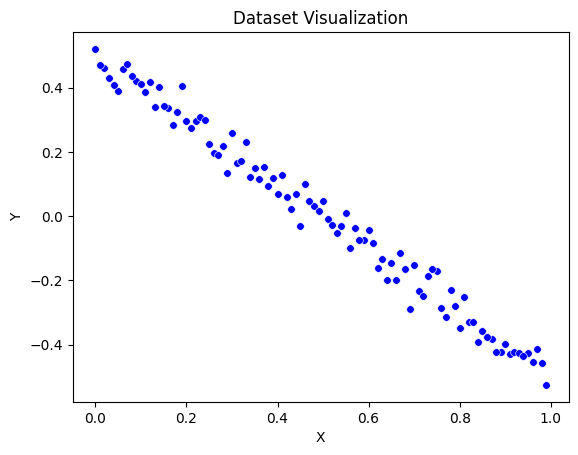

./dataset1.npy:


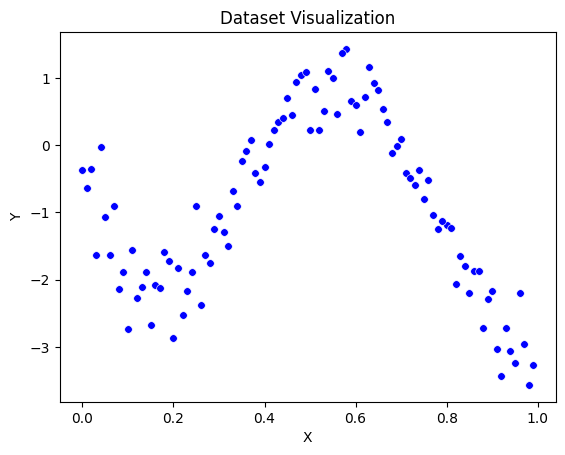

./dataset2.npy:


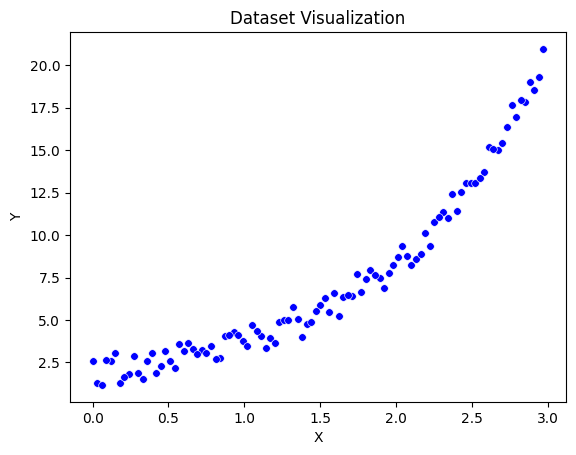

./dataset3.npy:


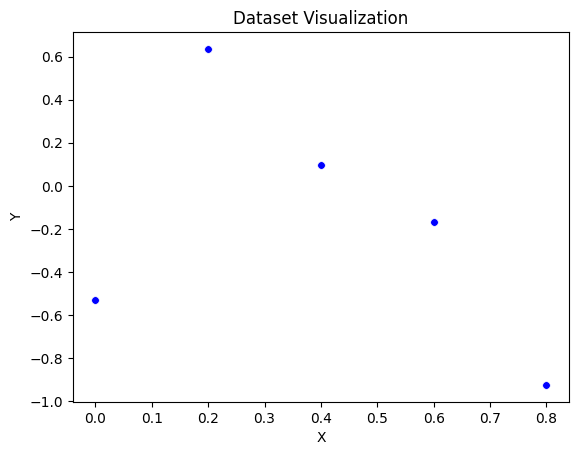

In [13]:
for name, (x, y) in datasets.items():
    print(f"{name}:")
    plot(x, y)

## Implementieren Sie den least squares Algorithmus aus der Vorlesung


In [14]:
def regression(X, y):
    if X.ndim == 1:
        X = X[:, np.newaxis]
    
    X_b = np.hstack([X, np.ones((X.shape[0], 1))])
    
    w, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=None)
    
    return w  


In [17]:
def plot_with_regression_function(x, y, w):
    plt.figure()  # Create a new figure to prevent overlapping plots
    plt.scatter(x, y, color='blue', label='Data Points')  # Scatter plot for data points
    
    # Generate a range for x values
    x_range = np.linspace(x.min(), x.max(), 100)
    y_pred = w[0] * x_range + w[1]  # Calculate the predicted y values using the weights

    # Plot regression line
    plt.plot(x_range, y_pred, color='red', label='Regression Line')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

./dataset0.npy:
[-0.99630994  0.49810246]


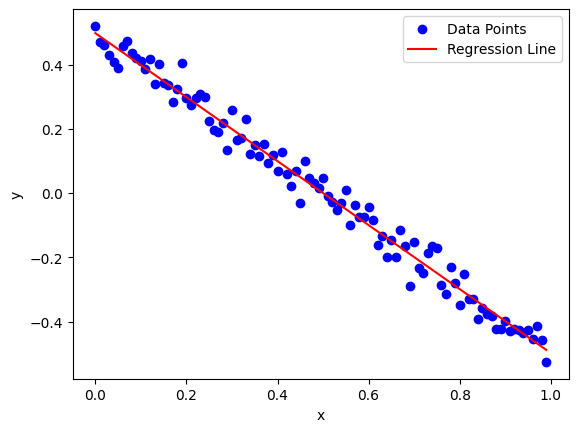

./dataset1.npy:
[-0.33683048 -0.77692713]


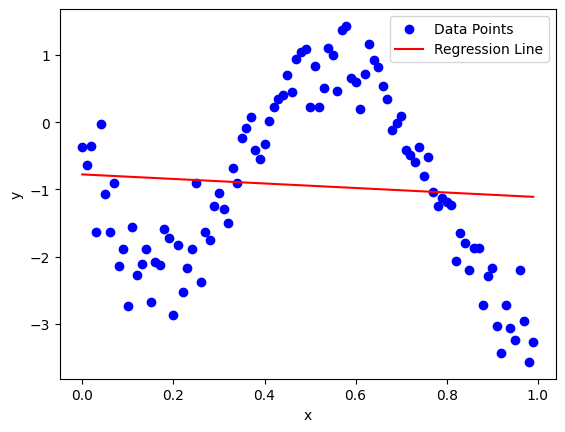

./dataset2.npy:
[ 5.43477884 -0.79945318]


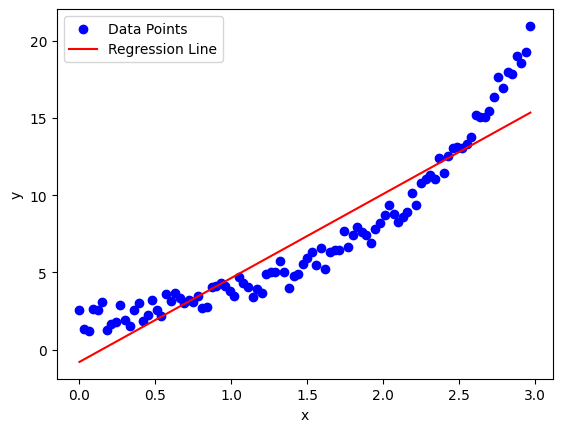

./dataset3.npy:
[-0.79614046  0.14072708]


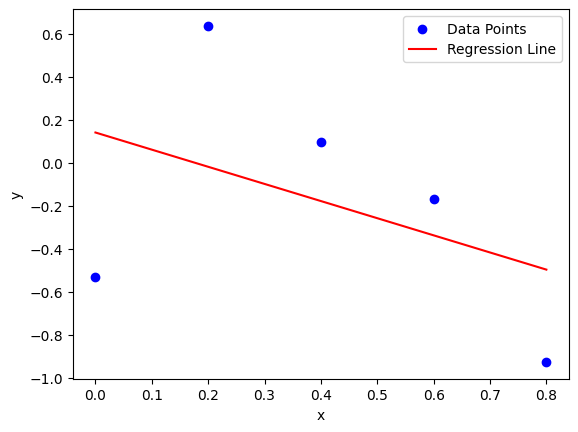

In [18]:
for name, (x, y) in datasets.items():
    print(f"{name}:")

    w = regression(x, y)

    print(w)
    plot_with_regression_function(x, y, w)